In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = gym.make('FrozenLake-v1')

C:\Users\samsung\ANACONDA\envs\tf_1_py_3.7\lib\site-packages\gym\core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
C:\Users\samsung\ANACONDA\envs\tf_1_py_3.7\lib\site-packages\gym\wrappers\step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.

In [4]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

In [5]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.493


In [6]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[3.66544327e-02 3.46292121e-03 2.27471314e-03 2.41040981e-03]
 [1.81010785e-03 2.60920959e-03 2.01796678e-05 9.02824738e-02]
 [1.59415559e-01 6.72964916e-04 5.42657746e-03 2.33049604e-03]
 [1.31570805e-04 6.60333975e-04 5.29807729e-04 5.65919609e-03]
 [7.86278638e-02 2.17520598e-03 1.14560910e-04 3.64787647e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.15592303e-02 2.07519952e-04 8.30712006e-06 1.48851278e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.42994241e-05 6.65328277e-04 5.17061142e-04 1.80580959e-01]
 [6.16343772e-05 3.79595777e-01 3.21959246e-05 0.00000000e+00]
 [2.34523827e-01 1.32738674e-03 1.01319944e-03 4.32104723e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.02556379e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.23246198e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

Q-learning neural network

In [7]:
from __future__ import division

import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\samsung\ANACONDA\envs\tf_1_py_3.7\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
C:\Users\samsung\ANACONDA\envs\tf_1_py_3.7\lib\site-packages\tensorflow\core\framework\resource_handle_pb2.py:23: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  serialized_pb=_b('\n/tensorflow/core/framework/resource_handle.proto\x12\ntensorflow\"r\n\x13ResourceHandleProto\x12\x0e\n\x06\x64\x65vice\x18\x01 \x01(\t\x12\x11\n\tcontainer\x18\x02 \x01(\t\x12\x0c\n\x04name\x18\x03 \x01(\t\x12\x11\n\thash_code\x18\x04 \x01(\x04\x12\x17\n\x0fmaybe_type_name\x18\x05 \x01(\tBn\n\x18org.tensorflow.frameworkB\x0eResourceHandleP\x01Z=github.com/tensorflow/tensorflow/tensorflow/go/core/fram

In [8]:
tf.reset_default_graph()

In [9]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

C:\Users\samsung\ANACONDA\envs\tf_1_py_3.7\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


In [10]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            #np.identity 뜻은 정방단위행렬을 의미한다. 왜 이렇게.?
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")



Percent of succesful episodes: 0.437%


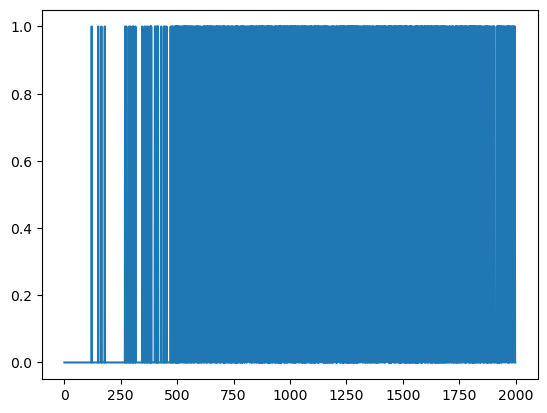

In [11]:
plt.plot(rList)

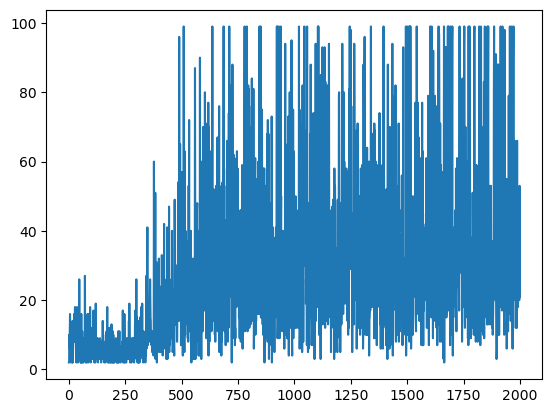

In [12]:
plt.plot(jList)